In [22]:
import numpy as np
from scipy.special import jv,jvp,hankel2,h2vp
import matplotlib.pyplot as plt

N = 5

In [23]:
def sigma_E(wavelength,a,phi):
    k = 2*np.pi/wavelength
    z=0
    for n in np.linspace(-N,N,2*N+1):
        z += jv(n,k*a)/hankel2(n,k*a)*np.exp(-1j*n*(phi-np.pi))
    return 4/k*np.abs(z)**2

def sigma_H(wavelength,a,phi):
    k = 2*np.pi/wavelength
    z=0
    for n in np.linspace(-N,N,2*N+1):
        z += jvp(n,k*a)/h2vp(n,k*a) * np.exp(-1j*n*(phi-np.pi))
    return 4/k*np.abs(z)**2
    

In [24]:
def E_polar_co(wavelength,a,phi):
    k = np.pi*2/wavelength
    z = 0
    for n in np.linspace(-N,N,2*N+1):
        z += jv(n,k*a)/hankel2(n,k*a) * np.exp(-1j*n*(phi-np.pi))
    return z #*np.sqrt(2/np.pi/k)*np.exp(1j*np.pi/4)

def H_polar_co(wavelength,a,phi):
    k = np.pi*2/wavelength
    z=0
    for n in np.linspace(-N,N,2*N+1):
        z += jvp(n,k*a)/h2vp(n,k*a) * np.exp(-1j*n*(phi-np.pi))
    return z #*np.sqrt(2/np.pi/k)*np.exp(1j*np.pi/4)

## 1. scatter coefficient vs scattering angle, at different wavelength
 * diameter of the wire, a = 0.127
 * wire spacing, L = 600

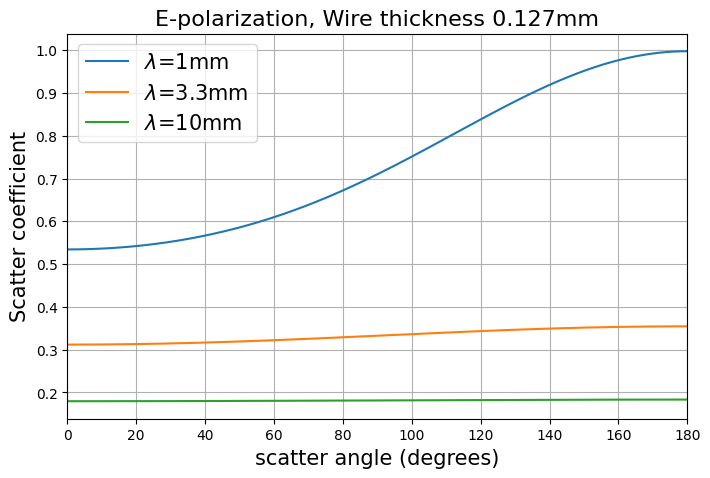

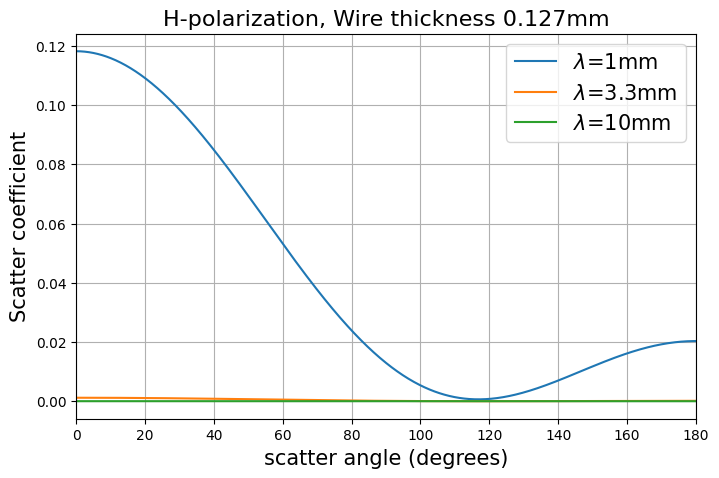

In [25]:
Lambda1 = [1,3.3,10] #mm
a =0.127/2
L=600
co_E = {}
co_H = {}
Phi = np.linspace(0,np.pi,1001)
for wave in Lambda1:
    K = 2*np.pi/wave
    co_E[str(wave)] = E_polar_co(wave,a,Phi)
    co_H[str(wave)] = H_polar_co(wave,a,Phi)

fig = plt.figure(figsize = (8,5))
for key in co_E:
    plt.plot(Phi*180/np.pi,np.abs(co_E[key])**2,label ='$\lambda$='+ key+'mm')
plt.legend(fontsize= 15)
plt.ylabel('Scatter coefficient',fontsize=15)
plt.xlabel('scatter angle (degrees)',fontsize=15)
plt.title('E-polarization, Wire thickness 0.127mm',fontsize=16)
plt.grid(which ='both',axis='both')
plt.xlim([0,180])
plt.show()

fig = plt.figure(figsize = (8,5))
for key in co_H:
    plt.plot(Phi*180/np.pi,np.abs(co_H[key])**2,label ='$\lambda$='+ key+'mm')
plt.legend(fontsize= 15)
plt.ylabel('Scatter coefficient',fontsize=15)
plt.xlabel('scatter angle (degrees)',fontsize=15)
plt.title('H-polarization, Wire thickness 0.127mm',fontsize=16)
plt.grid(which ='both',axis='both')
plt.xlim([0,180])
plt.show()

## 2. scatter cross section vs scattering angle, at different wavelength
 * diameter of the wire, a = 0.127
 * wire spacing, L = 600

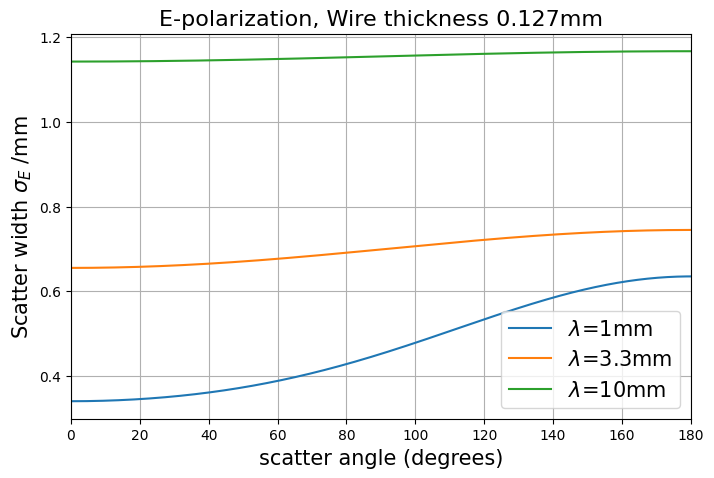

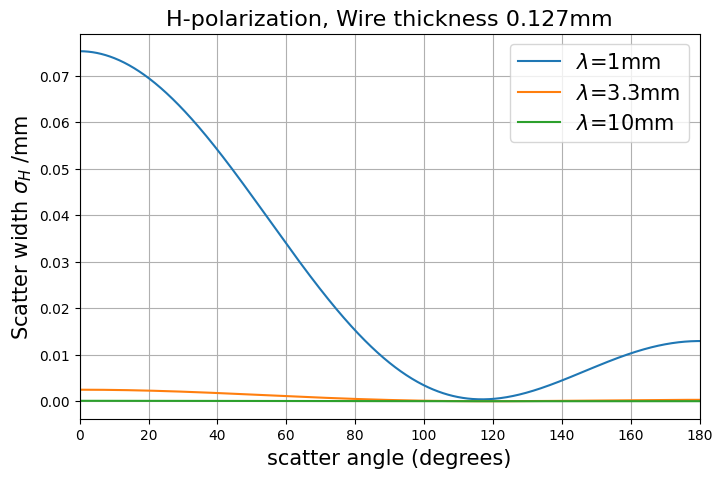

In [26]:
Lambda1 = [1,3.3,10] #mm
a =0.127/2
L=600
A_E = {}
A_H = {}
Phi = np.linspace(0,np.pi,1001)
for wave in Lambda1:
    K = 2*np.pi/wave
    A_E[str(wave)] = sigma_E(wave,a,Phi)
    A_H[str(wave)] = sigma_H(wave,a,Phi)

fig = plt.figure(figsize = (8,5))
for key in A_E:
    plt.plot(Phi*180/np.pi,np.abs(A_E[key]),label ='$\lambda$='+ key+'mm')
plt.legend(fontsize= 15)
plt.ylabel('Scatter width $\sigma_E$ /mm',fontsize=15)
plt.xlabel('scatter angle (degrees)',fontsize=15)
plt.title('E-polarization, Wire thickness 0.127mm',fontsize=16)
plt.grid(which ='both',axis='both')
plt.xlim([0,180])
plt.show()

fig = plt.figure(figsize = (8,5))
for key in A_H:
    plt.plot(Phi*180/np.pi,np.abs(A_H[key]),label ='$\lambda$='+ key+'mm')
plt.legend(fontsize= 15)
plt.ylabel('Scatter width $\sigma_H$ /mm',fontsize=15)
plt.xlabel('scatter angle (degrees)',fontsize=15)
plt.title('H-polarization, Wire thickness 0.127mm',fontsize=16)
plt.grid(which ='both',axis='both')
plt.xlim([0,180])
plt.show()

## 3. Scattering Fraction for a set of wires with different wire spacing

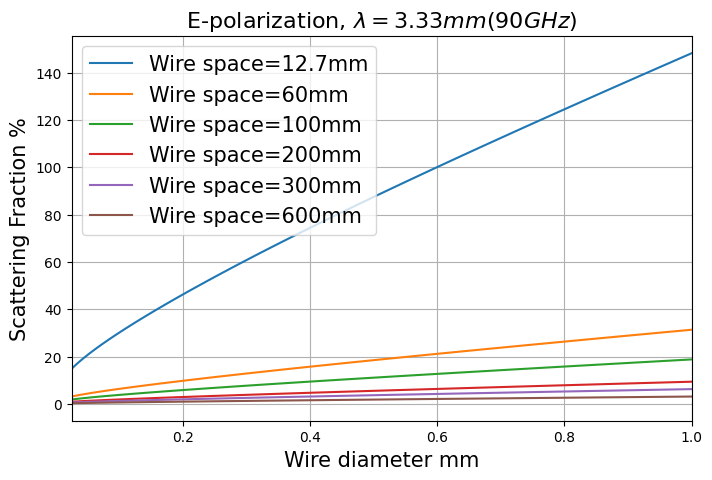

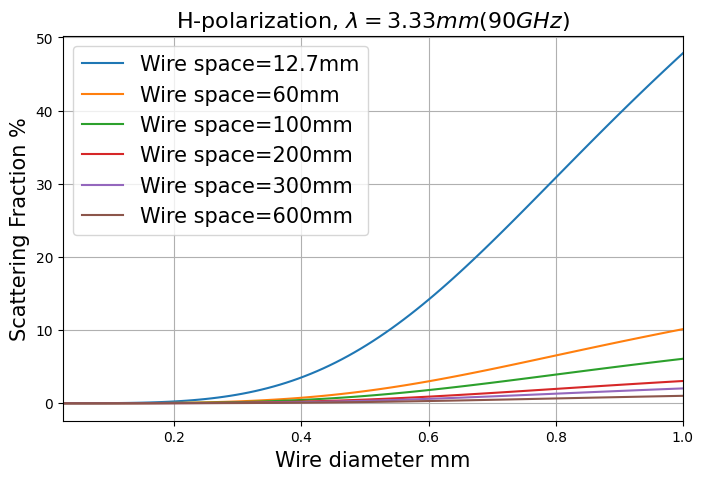

1489.6572134233668


In [47]:
wave = 3.33#mm #mm
a = np.linspace(0.025,1,101).reshape(-1,1)
spacing = [12.7,60,100,200,300,600]
F_E = {}
F_H = {}
Phi = np.linspace(0,2*np.pi,1001)
d_p = Phi[1]-Phi[0]
for L in spacing:
    K = 2*np.pi/wave
    F_E[str(L)] = (sigma_E(wave,a/2,Phi)*d_p).sum(axis=1)/L
    F_H[str(L)] = (sigma_H(wave,a/2,Phi)*d_p).sum(axis=1)/L

fig = plt.figure(figsize = (8,5))
for key in F_E:
    plt.plot(a,np.abs(F_E[key])*100,label ='Wire space='+ key+'mm')
plt.legend(fontsize= 15)
plt.ylabel('Scattering Fraction %',fontsize=15)
plt.xlabel('Wire diameter mm',fontsize=15)
plt.title('E-polarization, $\lambda = 3.33mm (90GHz)$',fontsize=16)
plt.grid(which ='both',axis='both')
plt.xlim([a[0],a[-1]])
plt.show()

fig = plt.figure(figsize = (8,5))
for key in F_H:
    plt.plot(a,np.abs(F_H[key])*100,label ='Wire space='+ key+'mm')
plt.legend(fontsize= 15)
plt.ylabel('Scattering Fraction %',fontsize=15)
plt.xlabel('Wire diameter mm',fontsize=15)
plt.title('H-polarization, $\lambda = 3.33mm (90GHz)$',fontsize=16)
plt.grid(which ='both',axis='both')
plt.xlim([a[0],a[-1]])
plt.show()

print(F_E['12.7'][0]*10*1000)

In [38]:
x = np.ones((5,10))
x.sum(axis=1)

array([10., 10., 10., 10., 10.])

In [8]:

Lambda = 3.33
L=600
K= 2*np.pi/Lambda
a = 10/2#0.127/2
Phi = np.linspace(0,2*np.pi,1001)
dPhi = Phi[1]-Phi[0]
beam = np.array([])
for asize in [0.1/2,1/2]:#[0.1/2, 0.5/2, 1/2, 5/2, 10/2]:
    beam  = np.append(beam,E_polar_co(Lambda,asize,Phi))
beam = np.array(beam).reshape(-1,1001)
print((sigma_E(Lambda,a,Phi)*dPhi).sum()/2/np.pi,4*a)
print(np.abs(beam)**2)

5.954643060783623 20.0
[[0.27489465 0.27489488 0.2748956  ... 0.2748956  0.27489488 0.27489465]
 [0.91103699 0.91103566 0.91103166 ... 0.91103166 0.91103566 0.91103699]]


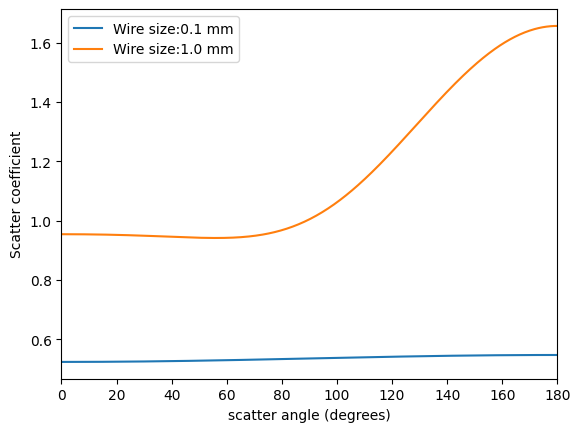

In [9]:
n=0
for asize in [0.1/2,1/2]:#[0.1/2, 0.5/2, 1/2, 5/2, 10/2]:
    plt.plot(Phi*180/np.pi, np.abs(beam[n,:]),label = 'Wire size:'+str(asize*2)+' mm')
    n+=1
plt.xlim([0,180])
plt.legend()
plt.ylabel('Scatter coefficient')
plt.xlabel('scatter angle (degrees)')
plt.savefig('scatter coefficient.png')
plt.show()

In [60]:

Lambda = 3.33
L=100
K= 2*np.pi/Lambda
a = 0.127/2#0.127/2
Phi = np.linspace(0,2*np.pi,1001)
dPhi = Phi[1]-Phi[0]
beam = np.array([])

beam  = E_polar_co(Lambda,asize,Phi)
print((sigma_E(Lambda,a,Phi)*dPhi).sum()/2/np.pi,4*a)
print(np.abs(beam)**2)

0.7024598951052066 0.254
[0.30977837 0.30977748 0.30977481 ... 0.30977481 0.30977748 0.30977837]


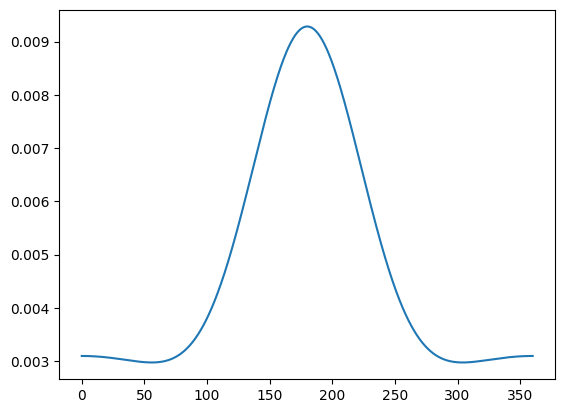

0.0635


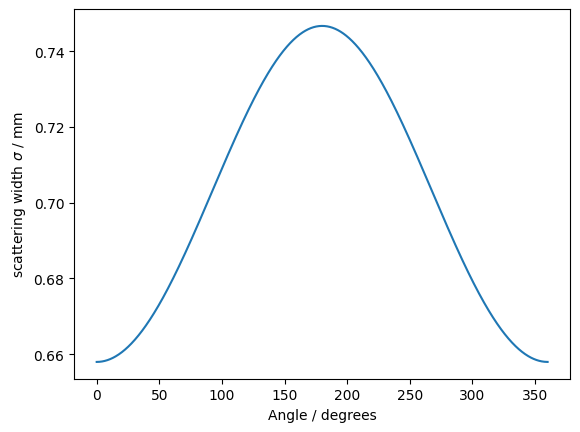

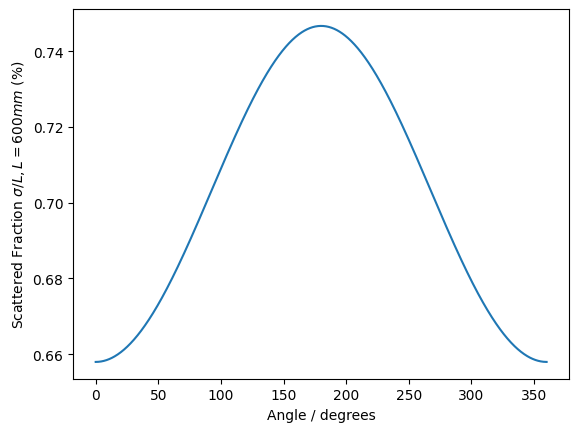

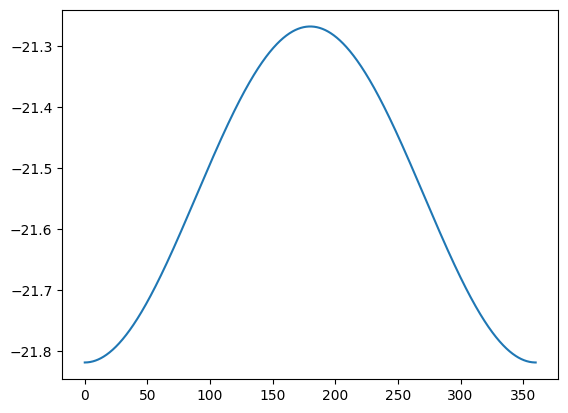

In [61]:
plt.plot(Phi*180/np.pi,(np.abs(beam)**2)/L)
plt.show()
#plt.xlim([0,180])
print(a)
sigma = sigma_E(Lambda,a,Phi)
plt.plot(Phi*180/np.pi,sigma)
plt.xlabel('Angle / degrees')
plt.ylabel('scattering width $\sigma$ / mm')
plt.savefig('scattering width.png')
plt.show()

plt.plot(Phi*180/np.pi,sigma/L*100)
plt.ylabel('Scattered Fraction $\sigma/ L, L=600mm$ (%)')
plt.xlabel('Angle / degrees')
plt.savefig('scattering fraction.png')
plt.show()

plt.plot(Phi*180/np.pi,np.log10(sigma/L)*10)
plt.show()

2.493125631071703 0.05
[0.04766845 0.04766845 0.04766845 ... 0.04807948 0.04807948 0.04807949]


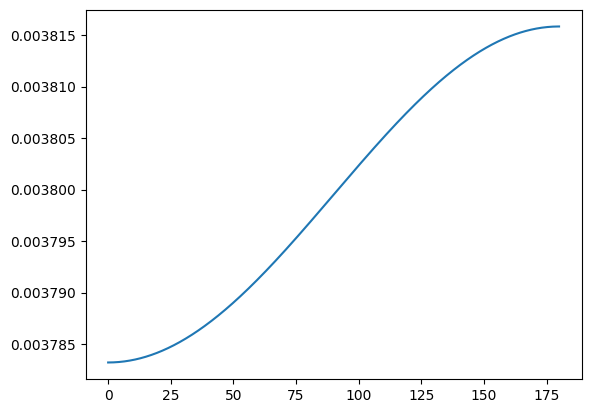

0.0125


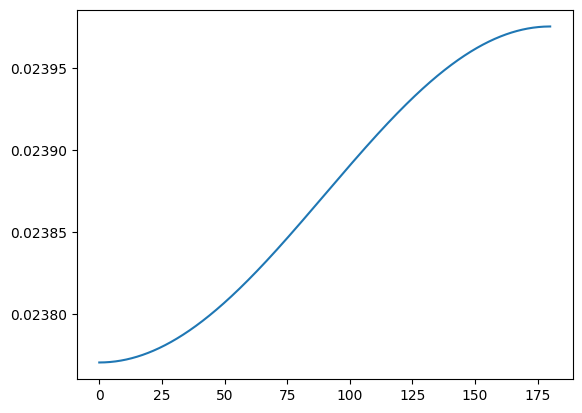

In [14]:
Lambda = 3.33
L=12.6
K= 2*np.pi/Lambda
a = 0.025/2
#Phi = np.linspace(0,np.pi,1001)
Phi = np.linspace(0,np.pi,1001)
beam  = E_polar_co(Lambda,a,Phi)
print((sigma_E(1,0.1/2,Phi)*np.pi/1000).sum()*2,4*a)
print(np.abs(beam)**2)

plt.plot(Phi*180/np.pi,(np.abs(beam)**2)/L)
plt.show()
#plt.xlim([0,180])
print(a)
sigma = sigma_E(Lambda,a,Phi)
plt.plot(Phi*180/np.pi,sigma/L)
plt.show()

In [16]:
0.023*2*np.pi*10

1.4451326206513049